The goal for this analysis is to see if we can predict a delay. We will be using the Airlines dataset from the Airlines dataset to predict a delay. We will first look data and do some basic analysis. We will be using python to access, interact, and visualize our data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv


We first will access our data and take a look at what we are working with.

In [2]:
airlines = pd.read_csv('/kaggle/input/airlines-dataset-to-predict-a-delay/Airlines.csv')

In [3]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [4]:
airlines.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [5]:
airlines.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


Now that we have a brief overview of our data, we will see if we need to do any cleaning by checking if theres any null values or duplicate values. There doesn't seem to be anything wrong with the type our columns are.

In [6]:
airlines.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [7]:
airlines.duplicated().sum()

0

There seems to be no null values or duplicated values in our data. Since theres no noticable error that we can detect, we will look at our data to see any noticable trends. One thing we notice is that it is hard to distingush the meaning of Time in our dataset. I think it would be better to leave it out for now.

# Airlines and their delays

There are 18 unique Airlines in the dataset. We will see how often each airline has delays.

In [8]:
dist_airlines = airlines['Airline'].unique()
dist_airlines

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

<AxesSubplot:xlabel='Airline', ylabel='Delay'>

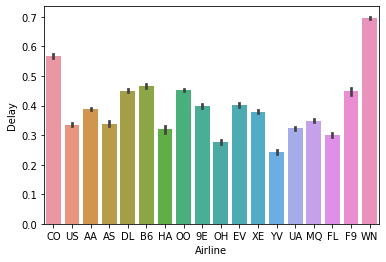

In [9]:
sb.barplot(x= airlines['Airline'], y = airlines['Delay'])

It looks like each airline has different amounts of delays. Some airlines are more likely to have delays compared to other airlines. For example, the WN airline are delayed about 70% of the time they have a flight.

# Time of day and delays

Next we will see if theres any possible relationship between the day of the week and if theres a delay for each airlines

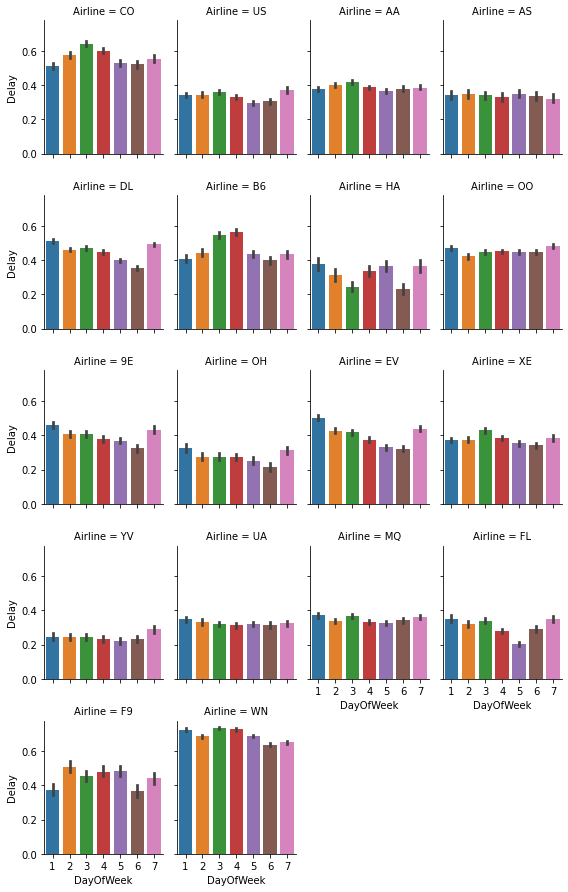

In [10]:
sb.catplot(data=airlines[airlines.notnull()], x='DayOfWeek',y='Delay',col_wrap = 4,
           col= 'Airline', kind="bar", height = 2.5, aspect=.8)

Based on the barplots, we see that some airlines do not have any relationship between the day it is and if theres a delay. Some airlines do. For example, the airline FL has the about the same amount of delay from Sunday to Wednesday, but it the delay is reduced when it is Thursday to Saturday. The airline B6 has increases of delay on Wednesday and Thurday compared to the rest of the day. A lot of the airlines also seem to have an increase of delay on Sunday.

# Average Length of the Flight by each airline vs Delay

<AxesSubplot:xlabel='Airline', ylabel='Length'>

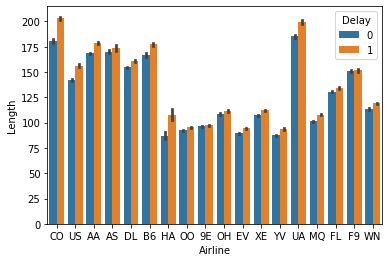

In [11]:
sb.barplot(x = airlines['Airline'], y = airlines['Length'], hue=airlines['Delay']) 
#They calculate the average length for when there is delay and no delay

One thing that can be seen is that for all the airlines, the flight length when there is a delay are always higher than the flight length when there is no delay. For most airlines, the difference can't be seen, but for CO, US, HA, and UA airlines, there is about a 20 minutes increase in flight length when there are delays.

# Final Thoughts



There are many possible factors that can tie into whether a flight will have a delay or not. Here we will list some of our findings:
* The airline you choose may have more delays compared to others
* The day of the week you choose your flight to be on.
* The length of the flight

Some airlines tends to have more delay compared to others. For example, the airline WN has an astounding delay chance of about 69% while the airline YV has a chance of about 24%. Although this seems like the case, we did not see the type of flight it was, the flight path, and many other factors. For example, airline WN may seem to have a higher delay chance but this may be due to that it is a smaller company or that it only handels longer flights. 

The day of the week you choose your flight to be on also has a impact. A few airlines are not part of this observation, but most airlines have days where they are more delayed than others. This can be seen in our barplots where we see that airlines like B6 has a significantly higher delay on Wednesday and Thursday than the rest of the days compared to airline FL, where it has less delay on Thursday to Saturday.

The length of the flight may indicate whether you might have a delay or not. For most airline, there is not difference on the length of the flight, but for a couple few, there is a significant increase of length of the flight when there is a delay when compared to no delay.

Although we were able to make these findings, it is not for certain that these are the factors that can indicate delays. We did not use the flight destinations, what type of airline it is, and had one column in our data that was not usable. If we were to potentially use these information, we can get more insight on what can be a good predictor of delays and potentially build a model for it.